In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

#https://www.kaggle.com/mishadey/b2b-invoice-payment-date-prediction-model

In [53]:
data = pd.read_csv('dataset.csv')

In [54]:
data.shape

(50000, 19)

In [58]:
data['document type'].value_counts()

RV    49994
X2        6
Name: document type, dtype: int64

In [5]:
data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0
49999,U001,0200020431,DEC corp,2019-01-15 00:00:00,2019.0,1.928576e+09,2019-01-05,20190105,20190105,20190124.0,USD,RV,1.0,NaN,1790.30,20190101.0,NAM4,1.928576e+09,0


In [6]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
data.head(2)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0


In [8]:
data.shape

(50000, 19)

In [9]:
data.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

In [10]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [11]:
data.drop(['business_code','cust_number','name_customer','doc_id','posting_id','invoice_id','area_business'] ,
          axis=1 , inplace=True)
data

,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,2020-02-11 00:00:00,2020.0,2020-01-26,20200125,20200126,20200210.0,USD,RV,54273.28,20200126.0,NAH4,0
1,2019-08-08 00:00:00,2019.0,2019-07-22,20190722,20190722,20190811.0,USD,RV,79656.60,20190722.0,NAD1,0
2,2019-12-30 00:00:00,2019.0,2019-09-14,20190914,20190914,20190929.0,USD,RV,2253.86,20190914.0,NAA8,0
3,NaN,2020.0,2020-03-30,20200330,20200330,20200410.0,CAD,RV,3299.70,20200331.0,CA10,1
4,2019-11-25 00:00:00,2019.0,2019-11-13,20191113,20191113,20191128.0,USD,RV,33133.29,20191113.0,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,2020.0,2020-04-21,20200417,20200421,20200506.0,USD,RV,3187.86,20200421.0,NAA8,1
49996,2019-09-03 00:00:00,2019.0,2019-08-15,20190814,20190815,20190830.0,USD,RV,6766.54,20190815.0,NAH4,0
49997,2020-03-05 00:00:00,2020.0,2020-02-19,20200218,20200219,20200305.0,USD,RV,6120.86,20200219.0,NAA8,0
49998,2019-12-12 00:00:00,2019.0,2019-11-27,20191126,20191127,20191212.0,USD,RV,63.48,20191127.0,NAA8,0


In [12]:
data.isnull().sum()

clear_date                10000
buisness_year                 0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
isOpen                        0
dtype: int64

In [13]:
# data.invoice_id.interpolate(inplace=True)

In [14]:
data.columns

Index(['clear_date', 'buisness_year', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'isOpen'],
      dtype='object')

In [15]:
data.dtypes

clear_date                 object
buisness_year             float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
isOpen                      int64
dtype: object

In [16]:
newdata = data[data.clear_date.isna()].copy()
data.dropna(inplace=True)

In [17]:
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d')
data['document_create_date']=pd.to_datetime(data['document_create_date'],format='%Y%m%d')
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')

data['clear_date'] = pd.to_datetime(data['clear_date'] )

data['time_remaining1'] = data['due_in_date'] - data['document_create_date']
data['time_remaining1'] = data['time_remaining1'].apply(lambda x: x.days)

data['time_remaining2'] = data['due_in_date'] - data['baseline_create_date']
data['time_remaining2'] = data['time_remaining2'].apply(lambda x: x.days)

# data['time_remaining3'] = data['clear_date'] - data['document_create_date']
# data['time_remaining3'] = data['time_remaining3'].apply(lambda x: int(x.days))

# data['time_remaining4'] = data['clear_date'] - data['baseline_create_date']
# data['time_remaining4'] = data['time_remaining4'].apply(lambda x: int(x.days))


In [18]:
list(data)

['clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'isOpen',
 'time_remaining1',
 'time_remaining2']

In [19]:
data.head(3)

,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,time_remaining1,time_remaining2
0,2020-02-11,2020.0,2020-01-26,2020-01-25,20200126,2020-02-10,USD,RV,54273.28,2020-01-26,NAH4,0,16,15
1,2019-08-08,2019.0,2019-07-22,2019-07-22,20190722,2019-08-11,USD,RV,79656.60,2019-07-22,NAD1,0,20,20
2,2019-12-30,2019.0,2019-09-14,2019-09-14,20190914,2019-09-29,USD,RV,2253.86,2019-09-14,NAA8,0,15,15


In [20]:
data = pd.get_dummies(data=data, columns=['document type', 'cust_payment_terms'])

In [21]:
data.head()

,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,...,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2
0,2020-02-11,2020.0,2020-01-26,2020-01-25,20200126,2020-02-10,USD,54273.28,2020-01-26,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-08-08,2019.0,2019-07-22,2019-07-22,20190722,2019-08-11,USD,79656.60,2019-07-22,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-12-30,2019.0,2019-09-14,2019-09-14,20190914,2019-09-29,USD,2253.86,2019-09-14,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-11-25,2019.0,2019-11-13,2019-11-13,20191113,2019-11-28,USD,33133.29,2019-11-13,0,...,0,0,0,0,0,0,0,0,0,0
5,2019-12-04,2019.0,2019-09-20,2019-09-20,20190920,2019-10-04,CAD,22225.84,2019-09-24,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.nunique()

clear_date                 403
buisness_year                2
posting_date               424
document_create_date       427
document_create_date.1     424
                          ... 
cust_payment_terms_NAWM      2
cust_payment_terms_NAWN      2
cust_payment_terms_NAWP      2
cust_payment_terms_NAWU      2
cust_payment_terms_NAX2      2
Length: 84, dtype: int64

In [23]:
data.isnull().sum()

clear_date                 0
buisness_year              0
posting_date               0
document_create_date       0
document_create_date.1     0
                          ..
cust_payment_terms_NAWM    0
cust_payment_terms_NAWN    0
cust_payment_terms_NAWP    0
cust_payment_terms_NAWU    0
cust_payment_terms_NAX2    0
Length: 84, dtype: int64

In [24]:
data['actual_open_amount'] = data['total_open_amount'].where(data['invoice_currency']=='USD', data['total_open_amount'] * 0.79)


In [25]:
data['actual_open_amount']

0        54273.2800
1        79656.6000
2         2253.8600
4        33133.2900
5        17558.4136
            ...    
49994    84780.4000
49996     6766.5400
49997     6120.8600
49998       63.4800
49999     1790.3000
Name: actual_open_amount, Length: 40000, dtype: float64

In [26]:
# data.drop(['invoice_currency','isOpen'],axis =1,inplace = True)


In [27]:
# data['clear_date']=pd.to_datetime(data['clear_date']).dt.normalize()
# data

In [28]:
# data['posting_date']=pd.to_datetime(data['posting_date']).dt.normalize()
# data

In [29]:
# data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d')
# data

In [30]:
data['delay_days'] = pd.to_numeric((data['clear_date']- data['due_in_date']).dt.days, downcast='integer')
data

,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,...,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,actual_open_amount,delay_days
0,2020-02-11,2020.0,2020-01-26,2020-01-25,20200126,2020-02-10,USD,54273.28,2020-01-26,0,...,0,0,0,0,0,0,0,0,54273.2800,1
1,2019-08-08,2019.0,2019-07-22,2019-07-22,20190722,2019-08-11,USD,79656.60,2019-07-22,0,...,0,0,0,0,0,0,0,0,79656.6000,-3
2,2019-12-30,2019.0,2019-09-14,2019-09-14,20190914,2019-09-29,USD,2253.86,2019-09-14,0,...,0,0,0,0,0,0,0,0,2253.8600,92
4,2019-11-25,2019.0,2019-11-13,2019-11-13,20191113,2019-11-28,USD,33133.29,2019-11-13,0,...,0,0,0,0,0,0,0,0,33133.2900,-3
5,2019-12-04,2019.0,2019-09-20,2019-09-20,20190920,2019-10-04,CAD,22225.84,2019-09-24,0,...,0,0,0,0,0,0,0,0,17558.4136,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2019-07-25,2019.0,2019-07-10,2019-07-09,20190710,2019-07-25,USD,84780.40,2019-07-10,0,...,0,0,0,0,0,0,0,0,84780.4000,0
49996,2019-09-03,2019.0,2019-08-15,2019-08-14,20190815,2019-08-30,USD,6766.54,2019-08-15,0,...,0,0,0,0,0,0,0,0,6766.5400,4
49997,2020-03-05,2020.0,2020-02-19,2020-02-18,20200219,2020-03-05,USD,6120.86,2020-02-19,0,...,0,0,0,0,0,0,0,0,6120.8600,0
49998,2019-12-12,2019.0,2019-11-27,2019-11-26,20191127,2019-12-12,USD,63.48,2019-11-27,0,...,0,0,0,0,0,0,0,0,63.4800,0


In [31]:
# newdata1 = data[data.due_in_date.isna()].copy()
# newdata

In [32]:
data.drop(['invoice_currency','isOpen','clear_date','due_in_date'] ,axis=1 , inplace=True)
data

,buisness_year,posting_date,document_create_date,document_create_date.1,total_open_amount,baseline_create_date,time_remaining1,time_remaining2,document type_RV,document type_X2,...,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,actual_open_amount,delay_days
0,2020.0,2020-01-26,2020-01-25,20200126,54273.28,2020-01-26,16,15,1,0,...,0,0,0,0,0,0,0,0,54273.2800,1
1,2019.0,2019-07-22,2019-07-22,20190722,79656.60,2019-07-22,20,20,1,0,...,0,0,0,0,0,0,0,0,79656.6000,-3
2,2019.0,2019-09-14,2019-09-14,20190914,2253.86,2019-09-14,15,15,1,0,...,0,0,0,0,0,0,0,0,2253.8600,92
4,2019.0,2019-11-13,2019-11-13,20191113,33133.29,2019-11-13,15,15,1,0,...,0,0,0,0,0,0,0,0,33133.2900,-3
5,2019.0,2019-09-20,2019-09-20,20190920,22225.84,2019-09-24,14,10,1,0,...,0,0,0,0,0,0,0,0,17558.4136,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2019.0,2019-07-10,2019-07-09,20190710,84780.40,2019-07-10,16,15,1,0,...,0,0,0,0,0,0,0,0,84780.4000,0
49996,2019.0,2019-08-15,2019-08-14,20190815,6766.54,2019-08-15,16,15,1,0,...,0,0,0,0,0,0,0,0,6766.5400,4
49997,2020.0,2020-02-19,2020-02-18,20200219,6120.86,2020-02-19,16,15,1,0,...,0,0,0,0,0,0,0,0,6120.8600,0
49998,2019.0,2019-11-27,2019-11-26,20191127,63.48,2019-11-27,16,15,1,0,...,0,0,0,0,0,0,0,0,63.4800,0


In [33]:
data = data.drop(['buisness_year','posting_date','document_create_date','document_create_date.1','baseline_create_date'],axis=1)

In [34]:
data.reset_index(drop=True, inplace=True)
data

,total_open_amount,time_remaining1,time_remaining2,document type_RV,document type_X2,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,...,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,actual_open_amount,delay_days
0,54273.28,16,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54273.2800,1
1,79656.60,20,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,79656.6000,-3
2,2253.86,15,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2253.8600,92
3,33133.29,15,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33133.2900,-3
4,22225.84,14,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17558.4136,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,84780.40,16,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,84780.4000,0
39996,6766.54,16,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6766.5400,4
39997,6120.86,16,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6120.8600,0
39998,63.48,16,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,63.4800,0


In [35]:
X = data.drop('delay_days',axis=1)
y = data['delay_days']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()

<AxesSubplot:xlabel='delay_days', ylabel='Density'>

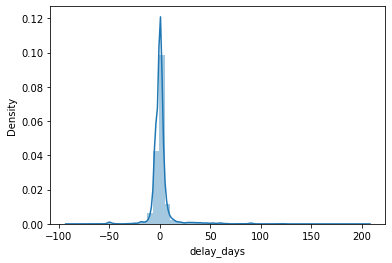

In [38]:
sns.distplot(y_train)

In [39]:
# sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x = 'delay_days',y='posting_date')


In [40]:
# sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x = 'document_create_date' , y='delay_days')

In [41]:
data.columns

Index(['total_open_amount', 'time_remaining1', 'time_remaining2',
       'document type_RV', 'document type_X2', 'cust_payment_terms_90M7',
       'cust_payment_terms_B052', 'cust_payment_terms_BR12',
       'cust_payment_terms_BR56', 'cust_payment_terms_C106',
       'cust_payment_terms_CA10', 'cust_payment_terms_CA30',
       'cust_payment_terms_CA60', 'cust_payment_terms_CAB1',
       'cust_payment_terms_CAX2', 'cust_payment_terms_MC15',
       'cust_payment_terms_NA10', 'cust_payment_terms_NA25',
       'cust_payment_terms_NA31', 'cust_payment_terms_NA32',
       'cust_payment_terms_NA38', 'cust_payment_terms_NA3B',
       'cust_payment_terms_NA3F', 'cust_payment_terms_NA84',
       'cust_payment_terms_NA8Q', 'cust_payment_terms_NA9X',
       'cust_payment_terms_NAA8', 'cust_payment_terms_NAAW',
       'cust_payment_terms_NAAX', 'cust_payment_terms_NAB1',
       'cust_payment_terms_NABD', 'cust_payment_terms_NABG',
       'cust_payment_terms_NAC6', 'cust_payment_terms_NACB',
      

In [42]:
X_train

array([[-0.68436653, -0.09799551, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.69984462],
       [-0.38622652, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.38404706],
       [-0.78923018, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.81091891],
       ...,
       [-0.47901502, -0.19124409, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.48233103],
       [-0.24352971, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.23289892],
       [-0.52570263,  0.08850164, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.53178374]])

In [43]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(15,10))

# sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True)

In [44]:
X_train

array([[-0.68436653, -0.09799551, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.69984462],
       [-0.38622652, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.38404706],
       [-0.78923018, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.81091891],
       ...,
       [-0.47901502, -0.19124409, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.48233103],
       [-0.24352971, -0.28449267, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.23289892],
       [-0.52570263,  0.08850164, -0.2131858 , ..., -0.05398816,
        -0.11793885, -0.53178374]])

In [45]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(15,10))

# sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True)


# Model

In [46]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train,y_train)


LinearRegression()

In [47]:
lr_predict = base_model.predict(X_test)
lr_predict

array([ 1.72825158, -7.47157752, -2.08426368, ...,  1.59784997,
       -7.45546424,  2.32717431])

In [48]:
pd.DataFrame(zip(lr_predict, y_test),columns=['Predicted','Actuals'])

,Predicted,Actuals
0,1.728252,1
1,-7.471578,-7
2,-2.084264,-3
3,1.760112,0
4,0.373225,0
...,...,...
7995,2.835857,2
7996,0.710612,-5
7997,1.597850,2
7998,-7.455464,-9


In [49]:
from sklearn.metrics import mean_absolute_error as mae,s
print('{:.20f}'.format(mae(y_test,lr_predict)))

827749574.67339897155761718750


In [51]:
mae(abs(y_test),abs(lr_predict))

827749574.0832503